In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import train test split
from sklearn.model_selection import train_test_split
# import the linear regression model
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

# Boston housing dataset - Exploratory Data Analysis (EDA)

- Kaggle [competition page](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
- See the `data_description.txt` file in this folder

# Part I : Loading the data and initial exploration

## Step 1-I: Import the data (schema, types, etc.)

Since this is a Kaggle competition, there is a separate dataset for which only Kaggle knows the targets. 

Otherwise people would submit the known targets and get a perfect score. `df_test` loaded from `test.csv` is the part of the data for which we don't know the targets (SalePrice).


In [10]:
df_train = pd.read_csv('train.csv', keep_default_na=False) 
# prevents NA to be read as NaN (missing value) 
# for categorical data NA is a valid value
# so NA is read as NA nor as NaN
df_test = pd.read_csv('test.csv', keep_default_na=False)

The following categorical (textual) columns contain string values `"NA"`, which might be erroneously considered as missing value by pandas:

- `Alley` : NA = No alley access

- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` : NA = No Basement

- `FireplaceQu` : NA = No Fireplace

- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` : NA = No Garage

- `PoolQC` : NA = No Pool

- `Fence` : NA = No Fence

- `MiscFeature` : NA = None

## Step 2-I: Getting familiar with the data

#### What are the types of the `df_train` and `df_test`?

In [11]:
type(df_train)
type(df_test)


pandas.core.frame.DataFrame

In [12]:
# Check dataset dimensions
print(df_train.shape)
print(df_test.shape)


(1460, 81)
(1459, 80)


#### What is the size of the train and test data?

In [13]:
print(df_train.shape)
print(df_test.shape)


(1460, 81)
(1459, 80)


(1460, 81)
(1459, 80)


#### Why the `test` data has one column less than the `train` data?

Answer: The test data has no target variable - the `SalePrice` column.

#### Print the top 5 rows of the DataFrame using the `head()` function

In [14]:
# Display the first 5 rows of the training dataset
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [15]:
# Display the first 5 rows of the test dataset
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [16]:

# There are lots of columns, Pandas omits most of them in an attempt to fit the text on the screen.
# We can use this trick to force it print all of the in a manageable format. `T` transposes the data frame.
print(df_train.head().T.to_string(max_rows=100))

                     0        1        2        3        4
Id                   1        2        3        4        5
MSSubClass          60       20       60       70       60
MSZoning            RL       RL       RL       RL       RL
LotFrontage         65       80       68       60       84
LotArea           8450     9600    11250     9550    14260
Street            Pave     Pave     Pave     Pave     Pave
Alley               NA       NA       NA       NA       NA
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1F

Note: As you can see for example for Alley column, the `NA` values are not considered as missing values (`NaN`).

#### Print the full list of all columns in the dataset (use `DataFrame.columns` attribute)

See `data_description.txt` for more information on the columns

In [18]:
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Find the data types of the columns (use `DataFrame.dtypes` attribute) - use .to_string() to show all columns in the output

In [19]:
print(df_train.dtypes.to_string())


Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

#### Looking at the data types of columns and compare them with descriptions in `data_description.txt` 

#### Columns `LotFrontage` and `MasVnrArea` need to be converted to numeric type (obscure import problem)

In [20]:
## Convert two columns to 'numeric' type as mentioned above
df_train['LotFrontage'] = pd.to_numeric(df_train['LotFrontage'], errors='coerce')
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')

#### When changing features, it's important to remember that any transformations that you've applied to the training data 
#### must be applied to the test data as well (before fitting the model).

In [23]:
df_train['LotFrontage'] = pd.to_numeric(df_train['LotFrontage'], errors='coerce')
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')


#### Print the 3 different data types in the dataset - Use `set()` function 

In [22]:
set(df_train.dtypes)


{dtype('int64'), dtype('float64'), dtype('O')}

{dtype('int64'), dtype('float64'), dtype('O')}

## Step 3-I: Handling missing values

#### View the missing values in all features

In [26]:
df_train.isnull().sum().sort_values(ascending=False)

LotFrontage     259
MasVnrArea        8
Id                0
KitchenAbvGr      0
GarageYrBlt       0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

#### Check the missing values in the test data

In [29]:
df_test.isnull().sum().sort_values(ascending=False)


LotFrontage      227
MasVnrArea        15
Id                 0
BedroomAbvGr       0
GarageType         0
                ... 
ExterQual          0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
SaleCondition      0
Length: 80, dtype: int64

In [30]:
df_train.dropna(subset=['LotFrontage', 'MasVnrArea'])


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


#### You can use `df.dropna(subset=['LotFrontage', 'MasVnrArea'])` to drop all the rows with missing values.


#### Or you can fill the missing values in `LotFrontage` and `MasVnrArea` with the mean value of the column in the entire dataset.

#### Note: Don't forget to apply the same transformation to the test data.

In [13]:
## Replacing missing values in the above mentioned two columns by their means
replacement = {'LotFrontage': df_train['LotFrontage'].mean(), 'MasVnrArea': df_train['MasVnrArea'].mean()}
df_train.fillna(replacement, inplace=True)
df_test.fillna(replacement, inplace=True)

**Note: we are filling in the mean of df, not df_test, we need to apply identical transformations to both dataframes**

## Step 4-I: Feature Engineering

#### Step 4a ) Adding a new feature `Age = YrSold - YearBuilt` to the dataset. 

In [31]:
## Create new column for the age of the house
df_train['Age'] = df_train['YrSold'] - df_train['YearBuilt']
## Drop the two columns from which we created new one
df_train.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
## View the dataframe again
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,250000,8


#### Perform the same transformation on the test data.

In [32]:
# Apply same feature engineering to test dataset
df_test['Age'] = df_test['YrSold'] - df_test['YearBuilt']
df_test.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

# View first few rows of the test dataset
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,WD,Normal,49
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,WD,Normal,52
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,WD,Normal,13
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,WD,Normal,12
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,WD,Normal,18


#### Step 4b) `SalePrice` Distribution and Transformation


#### If you want to see the summary statistics of `SalePrice`, what command would you use? (`Series.describe()`)

In [33]:
df_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Plot histogram of the target variable `SalePrice`

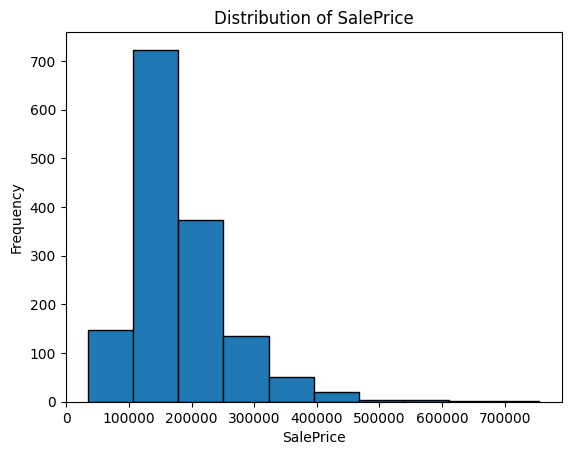

In [34]:
plt.hist(df_train['SalePrice'], bins=10, edgecolor='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

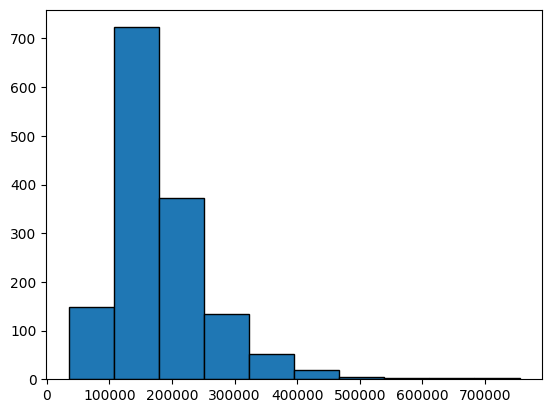

When a majority of the data points are concentrated on the left side or right side of the histogram, we say that the data is `skewed`.

When performing regression, sometimes it makes sense to `log-transform` the target variable when it is `skewed`. **One reason for this is to improve the linearity of the data.** 

We use `np.log()` function to `log-transform` the target variable.

In [36]:
df_train['LogPrice'] = np.log(df_train.SalePrice)

#### Plot a histogram of the `LogPrice`

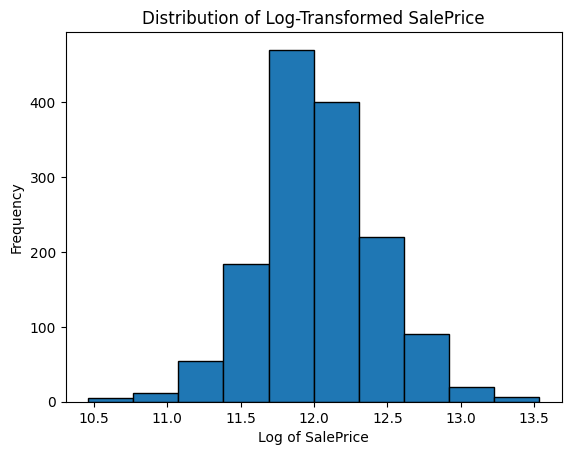

In [37]:
plt.hist(df_train['LogPrice'], bins=10, edgecolor='black')
plt.xlabel('Log of SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()


> # Our goal is to select a subset of features that are most relevant to predicting `LogPrice`.

# Part II : Feature Selection

## Step 1-II: Numerical Columns


#### Select all the numerical columns (`'int64'`, `'float64'`) in the dataset and then create a dataframe with the numerical columns only (`df_num`)

##### Approach 1: Look at `DataFrame.dtypes` as a `Dictionary` and loop over it with `(k, v) = Dictionary.items()` and select the columns (`k`) with dtype = `'int64'` or `'float64'`

In [38]:
# only numeric columns
numeric_cols = [k for k, f in df_train.dtypes.items() if f in ['int64', 'float64']]
print(numeric_cols)
df_num = df_train[numeric_cols]
df_num

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Age', 'LogPrice']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,61,0,0,0,0,0,2,208500,5,12.247694
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,0,5,181500,31,12.109011
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,42,0,0,0,0,0,9,223500,7,12.317167
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,35,272,0,0,0,0,2,140000,91,11.849398
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,84,0,0,0,0,0,12,250000,8,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,40,0,0,0,0,0,8,175000,8,12.072541
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,0,2,210000,32,12.254863
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,60,0,0,0,0,2500,5,266500,69,12.493130
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,0,112,0,0,0,0,4,142125,60,11.864462


##### Approach 2: Use `DataFrame.select_dtypes()` method and pass `inlcude=['int64', 'float64']` as argument

In [39]:
df_num= df_train.select_dtypes(include=['int64', 'float64'])
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,61,0,0,0,0,0,2,208500,5,12.247694
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,0,5,181500,31,12.109011
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,42,0,0,0,0,0,9,223500,7,12.317167
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,35,272,0,0,0,0,2,140000,91,11.849398
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,84,0,0,0,0,0,12,250000,8,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,40,0,0,0,0,0,8,175000,8,12.072541
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,0,2,210000,32,12.254863
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,60,0,0,0,0,2500,5,266500,69,12.493130
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,0,112,0,0,0,0,4,142125,60,11.864462


##  Step 2-II: Correlation (or relationship) between the columns (`DataFrame.corr()`) 

In [40]:
corr = df_num.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917,0.012724,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.040581,0.022936,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.028746,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.088866,0.193458,0.233633,0.049900,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.351799,-0.122848,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.013788,0.104160,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.550684,0.411876,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,0.073741,-0.128101,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325,-0.036868
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,1.000000,0.179618,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.179618,1.000000,0.264736,-0.072319,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.477493,-0.315562,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.128451,0.264736,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.248483,0.372023
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.067759,-0.072319,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.050422,0.004832


#### Print the correlations between the features and the target.

In [41]:
corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
SalePrice        1.000000
Age             -0.523350
LogPrice         0.948374
Name: SalePrice, dtype: float64

#### Print the five features that are most positively correlated with SalePrice and the five that are most negatively correlated.

#### use `.sort_values(ascending=False)` method to sort the values in descending order and select the first 5 and last 5 values with indexing

SalePrice      1.000000
LogPrice       0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Age             -0.523350
Name: SalePrice, dtype: float64


In [44]:
# Compute correlation of all features with SalePrice
corr = df_train.corr(numeric_only=True)

# Sort correlations in descending order
corr_target = corr['SalePrice'].sort_values(ascending=False)

# Display top and bottom 5 correlated features
print(corr_target.head(6))   # Top 5 + SalePrice itself
print(corr_target.tail(5))   # Bottom 5


SalePrice      1.000000
LogPrice       0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Age             -0.523350
Name: SalePrice, dtype: float64


> #### - The moset positively correlated features with SalePrice are: `[OverallQual, GrLivArea]`
> #### - The most negatively correlated features with SalePrice are: `[Age, KitchenAbvGr]`

## Step 3-II: Plot the `SalePrice` against the selected numericalfeatures.

#### The most positively correlated feature is `OverallQual`. 

In [45]:
df_num['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

#### Find the unique values of `OverallQual`.

In [46]:
df_num['OverallQual']


0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [47]:
df_train['OverallQual'].unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

#### Scatter plot `SalePrice` vs `OverallQual`

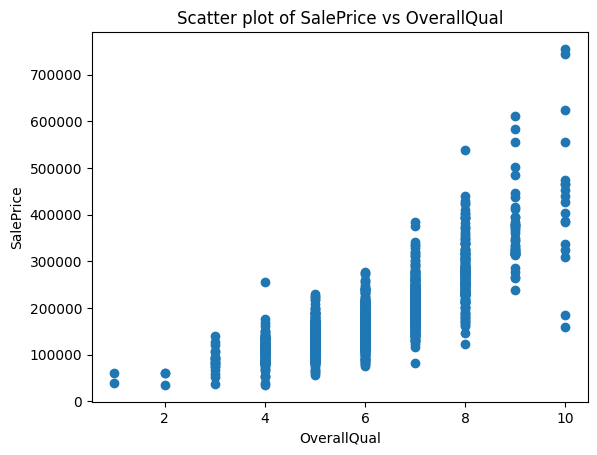

In [48]:
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Scatter plot of SalePrice vs OverallQual')
plt.show()


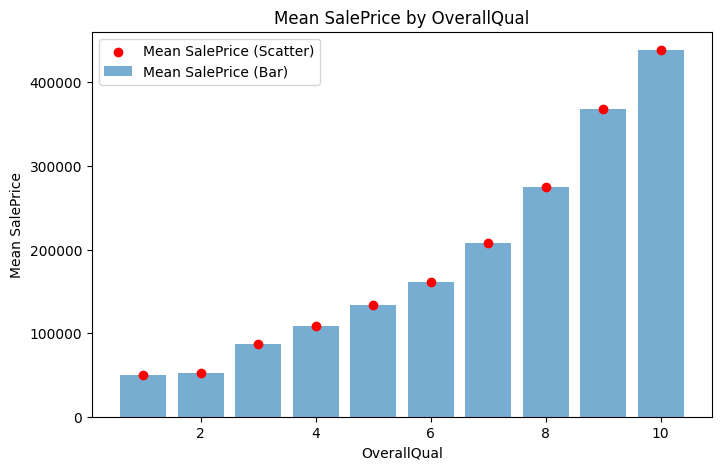

In [49]:
# Compute mean SalePrice for each OverallQual level
mean_prices = df_train.groupby('OverallQual')['SalePrice'].mean()

# Plot as both bar and scatter plot
plt.figure(figsize=(8,5))
plt.bar(mean_prices.index, mean_prices.values, alpha=0.6, label='Mean SalePrice (Bar)')
plt.scatter(mean_prices.index, mean_prices.values, color='red', label='Mean SalePrice (Scatter)')
plt.xlabel('OverallQual')
plt.ylabel('Mean SalePrice')
plt.title('Mean SalePrice by OverallQual')
plt.legend()
plt.show()


#### In each unique value of `OverallQual`, find the mean of `SalePrice` and plot it as a bar and scatter plot

Text(0, 0.5, 'SalePrice')

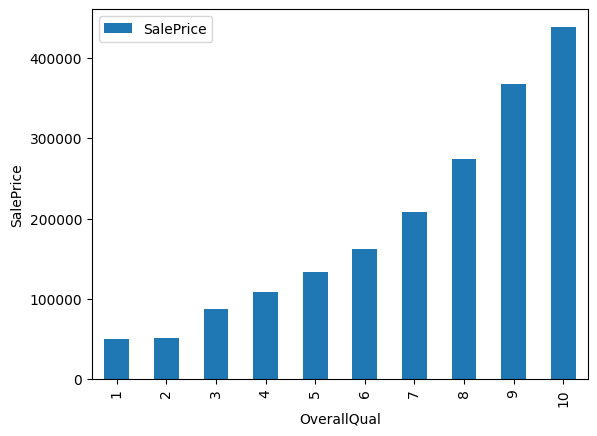

In [50]:
df_grouped_overal = df_num.groupby('OverallQual')[["SalePrice"]].mean()
df_grouped_overal.plot(kind='bar')
#label
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

#### How do you interpret the graph?

Your text here ...

In [ ]:
The graph shows a clear positive relationship between OverallQual (overall material and finish quality of the house) and SalePrice.
As the OverallQual score increases from 1 to 10, the average sale price increases steadily, indicating that homes with better construction quality and finishing tend to sell for significantly higher prices.
This suggests that OverallQual is one of the strongest predictors of house price — higher quality ratings strongly correlate with higher property values.

#### The second most positively correlated feature is `GrLivArea`.

#### Plot the scatter plot of `GrLivArea` and `LogPrice`.

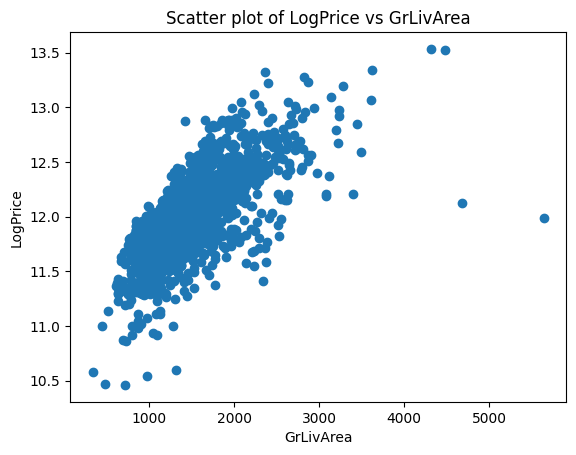

In [51]:
plt.scatter(df_train['GrLivArea'], df_train['LogPrice'])
plt.xlabel('GrLivArea')
plt.ylabel('LogPrice')
plt.title('Scatter plot of LogPrice vs GrLivArea')
plt.show()


Text(0, 0.5, 'LogPrice')

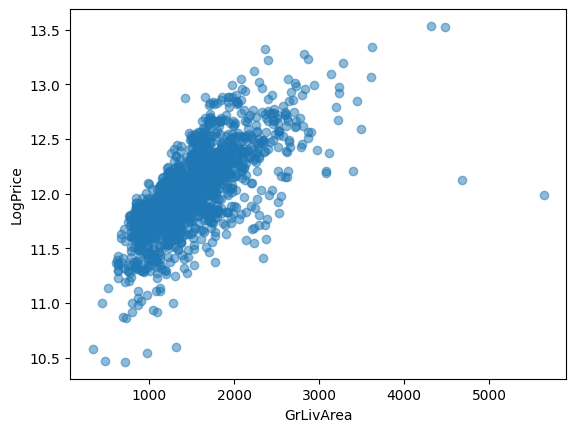

#### `Age` has a negative correlation with `SalePrice`.

#### Make scatter plots of `SalePrice` and `LogPrice` as a function `Age` (two separate plots).

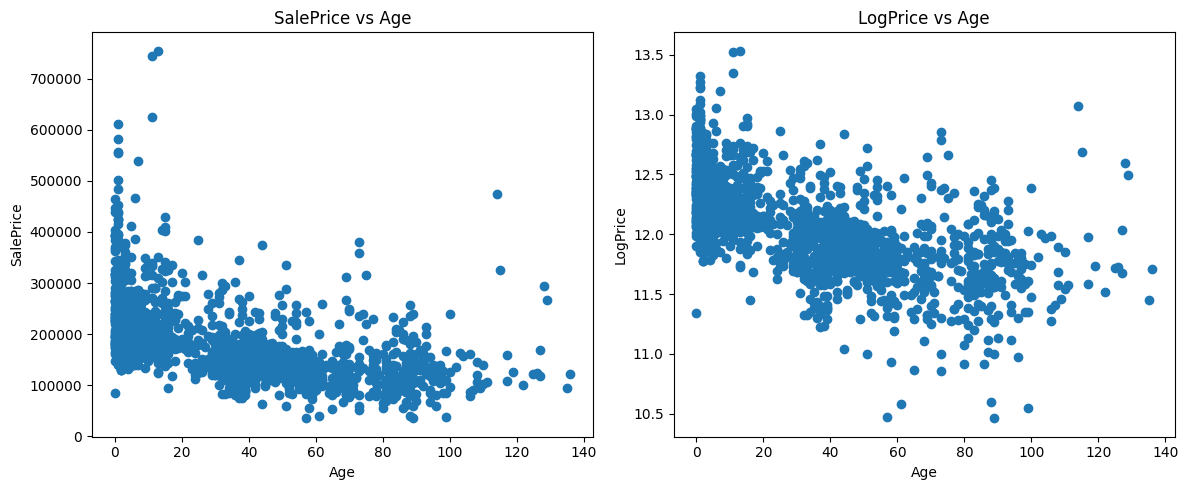

In [52]:
# Scatter plot of SalePrice vs Age
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(df_train['Age'], df_train['SalePrice'])
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Age')

# Scatter plot of LogPrice vs Age
plt.subplot(1, 2, 2)
plt.scatter(df_train['Age'], df_train['LogPrice'])
plt.xlabel('Age')
plt.ylabel('LogPrice')
plt.title('LogPrice vs Age')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'SlaePrice')

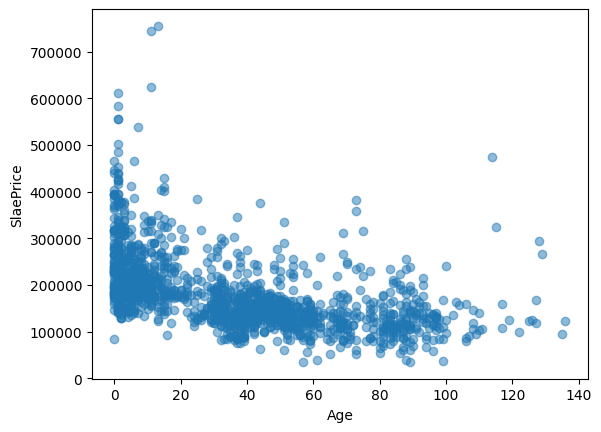

Text(0, 0.5, 'LogPrice')

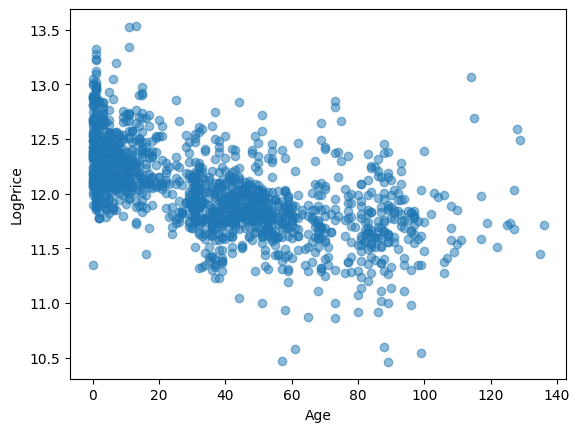

#### `KitchenAbvGr` has a negative correlation with `SalePrice`.

- Find the unique values of `KitchenAbvGr` and their counts. (`.value_counts()`)
- Plot the scatter plot of `KitchenAbvGr` and avrage of `SalePrice`. (use `groupby` and `mean`)

In [53]:
df_num['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

Text(0, 0.5, 'SalePrice')

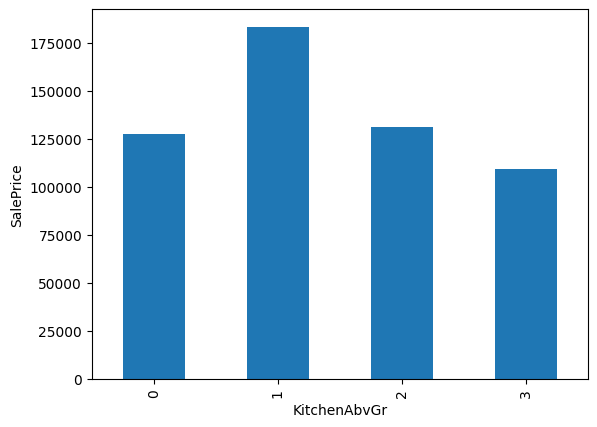

#### How do you interpret the graph?

Your text ...

## Step 4-II: Non-numerical Columns

### Let's look at the kitchen quality - `KitchenQual`
According to the the description KitchenQual has the following codes:
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor

Convert the quality codes to numbers, 0 for Poor, 1 for Fair etc.

In [28]:
df_train.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [29]:
df_test.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'NA'], dtype=object)

In [ ]:
qual_to_num = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}

In [ ]:
df_train["KitchenQualNum_mapped"] = df_train.KitchenQual.map(qual_to_num)

In [32]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,LogPrice,KitchenQualNum_mapped
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,2,WD,Normal,208500,5,12.247694,4
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,5,WD,Normal,181500,31,12.109011,3
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,9,WD,Normal,223500,7,12.317167,4
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,2,WD,Abnorml,140000,91,11.849398,4
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,12,WD,Normal,250000,8,12.429216,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,8,WD,Normal,175000,8,12.072541,3
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,MnPrv,NA,0,2,WD,Normal,210000,32,12.254863,3
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,WD,Normal,266500,69,12.493130,4
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,4,WD,Normal,142125,60,11.864462,4


#### Perform the same operation on the test dataset

In [ ]:
# Your code
df_test['KitchenQualNum_,apped'] = ...

In [ ]:
df_test['KitchenQualNum_mapped'].value_counts()

#### Plot the histogram of `KitchenQualNum_mapped`

In [54]:
# Map KitchenQual categories to numerical values
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

df_test['KitchenQualNum_mapped'] = df_test['KitchenQual'].map(quality_mapping)


(array([  0.,  39., 735., 586., 100.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

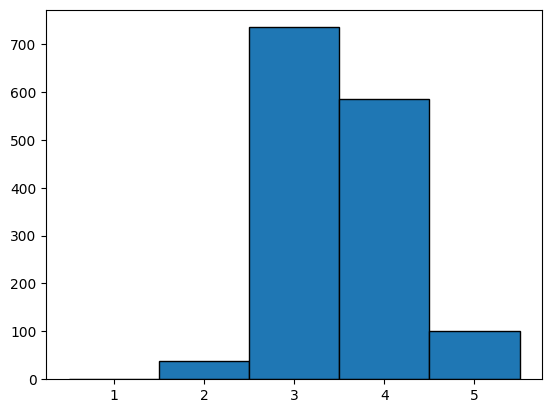

#### Scatter plot of `KitchenQualNum` (x) and `LogPrice` (y)

In [55]:
plt.scatter(df_train['KitchenQualNum_mapped'], df_train['LogPrice'])
plt.xlabel('KitchenQualNum')
plt.ylabel('LogPrice')
plt.title('Scatter plot of KitchenQualNum vs LogPrice')
plt.show()


KeyError: 'KitchenQualNum_mapped'

Text(0, 0.5, 'LogPrice')

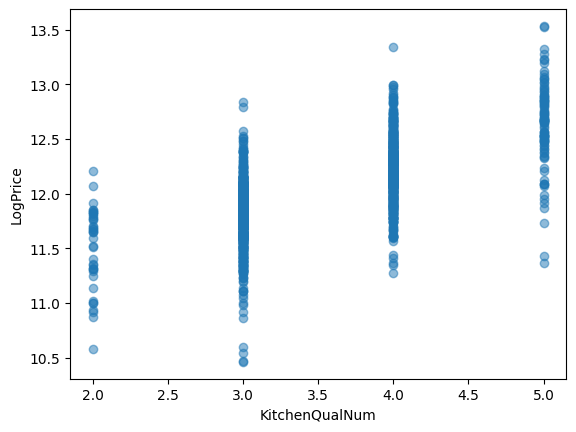

# Part III: Model building

In [56]:
fit_col = ['OverallQual', 'GrLivArea', 'Age', 'KitchenQualNum_mapped']

#### Define your X_train, y_train, and X_test

In [58]:
X = df_train[fit_col]
y = df_train['LogPrice']
X_test = df_test[fit_col]


KeyError: "['KitchenQualNum_mapped'] not in index"

#### Instantiate and train a Linear Regression model

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


NameError: name 'X' is not defined

LinearRegression()

#### Predict the Price for the __training__ data and use it to compute fit quality using the RMSE metric

In [60]:
from sklearn import metrics

predictions = model.predict(X)
error = metrics.root_mean_squared_error(y, predictions)
error


NameError: name 'X' is not defined

In [ ]:
error = metrics.root_mean_squared_error(None, None)

np.float64(0.17570690496898353)

#### Predict the target (LogPrice) for the test data

In [61]:
LogPrice = model.predict(X_test)


NameError: name 'X_test' is not defined

Returning the `LogPrice` to the original `Price` scale by using `np.exp()`
```python
Price = np.exp(LogPrice)
```

In [62]:
Price = np.exp(LogPrice)
Price[:10]  # show first 10 predicted prices


NameError: name 'LogPrice' is not defined

#### Can we use X_test to compute accuracy? Why? What do we do with the predicted `LogPrice`?

Your text